Lab
==========================================
Big Data I: StarCluster & IPython.parallel
------------------------------------------
Alessandro D. Gagliardi

# Acquire Valued Shoppers Challenge

<p><em>transactions<br></em><strong>id</strong>&nbsp;- A unique id representing a customer<br><strong>chain</strong> - An integer representing a store chain<br><strong>dept</strong>&nbsp;- An aggregate grouping of the Category (e.g. water)<br><strong>category</strong> - The product category (e.g. sparkling water)<br><strong>company</strong> - An id of the company&nbsp;that sells the item<br><strong>brand</strong> - An id of the brand to which the item belongs<br><strong>date</strong>&nbsp;- The date of purchase<br><strong>productsize</strong> - The amount of the product purchase (e.g. 16 oz of water)<br><strong>productmeasure</strong> - The units of the product purchase (e.g. ounces)<br><strong>purchasequantity</strong> - The number of units purchased<br><strong>purchaseamount</strong> - The dollar amount of the purchase</p>

A negative value in productquantity and purchaseamount indicates a return.

*see [kaggle.com/c/acquire-valued-shoppers-challenge](https://www.kaggle.com/c/acquire-valued-shoppers-challenge/data) for more details*

In [10]:
%matplotlib inline
import os

import pandas as pd

from seaborn import plt
from boto.s3.connection import S3Connection
from IPython.parallel import Client

In [17]:
credentials = pd.read_csv('C:\Users\David\Downloads\credentials.csv')

In [20]:
credentials['Secret Access Key'][0]

'kOQV1Hz7oZ5IJpFXtK+pFENr+I1bQDqD4ZBNdI7F'

In [21]:
s3conn = S3Connection(credentials['Access Key Id'][0], credentials['Secret Access Key'][0])
transactions = s3conn.get_bucket('dat-sf-12')

In [7]:
transaction_keys = transactions.get_all_keys(prefix='transactions')
len(transaction_keys)

350

In [8]:
%%time
# N.B. This takes a couple minutes...
transaction_keys[0].get_contents_to_filename('trans-aa.csv')

CPU times: user 1.44 s, sys: 1.34 s, total: 2.78 s
Wall time: 4min 50s


In [19]:
pd.read_csv?

In [ ]:
transactions_df = pd.read_csv('trans-aa.csv')

In [ ]:
transactions_df

In [21]:
transactions_df.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,86246,205,7,707,1078778070,12564,2012-03-02,12,OZ,1,7.59
1,86246,205,63,6319,107654575,17876,2012-03-02,64,OZ,1,1.59
2,86246,205,97,9753,1022027929,0,2012-03-02,1,CT,1,5.99
3,86246,205,25,2509,107996777,31373,2012-03-02,16,OZ,1,1.99
4,86246,205,55,5555,107684070,32094,2012-03-02,16,OZ,2,10.38


In [247]:
transactions_df.describe()

,id,chain,dept,category,company,brand,productsize,purchasequantity,purchaseamount
count,999999.000000,999999.00000,999999.000000,999999.000000,9.999990e+05,999999.000000,999999.000000,999999.000000,999999.000000
mean,63364052.944063,31.86412,41.416083,4155.292498,2.180884e+08,16031.482528,28.686506,1.377621,4.463513
std,24870195.303575,41.15973,27.773127,2779.941544,4.451214e+08,15418.426484,51.462686,1.086097,6.617972
min,86246.000000,2.00000,0.000000,0.000000,1.000000e+04,0.000000,0.000000,-18.000000,-163.490000
25%,54001770.000000,14.00000,18.000000,1850.000000,1.021130e+08,7755.000000,7.500000,1.000000,2.190000
50%,68382868.000000,17.00000,36.000000,3628.000000,1.039978e+08,13291.000000,14.500000,1.000000,3.490000
75%,82704044.000000,20.00000,60.000000,6001.000000,1.072891e+08,17090.000000,24.000000,1.000000,5.290000
max,96849591.000000,205.00000,99.000000,9999.000000,1.099753e+10,108338.000000,4000.000000,124.000000,1600.000000


In [248]:
transactions_df.groupby('id').purchasequantity.describe().head(24)

id             
86246     count    12609.000000
          mean         1.374653
          std          1.018240
          min          0.000000
          25%          1.000000
          50%          1.000000
          75%          1.000000
          max         22.000000
86252     count    12087.000000
          mean         1.456441
          std          1.224941
          min         -1.000000
          25%          1.000000
          50%          1.000000
          75%          2.000000
          max         39.000000
12262064  count     1101.000000
          mean         1.146231
          std          0.511199
          min          0.000000
          25%          1.000000
          50%          1.000000
          75%          1.000000
          max          8.000000
dtype: float64

In [45]:
transactions_df.groupby('id').purchasequantity.describe().unstack().head(10)

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
86246,12609,1.374653,1.018240,0,1,1,1,22
86252,12087,1.456441,1.224941,-1,1,1,2,39
12262064,1101,1.146231,0.511199,0,1,1,1,8
12277270,1361,1.203527,0.605504,0,1,1,1,6
12332190,684,1.302632,1.059265,1,1,1,1,16
12524696,985,1.291371,0.850261,-3,1,1,1,10
12682470,806,1.217122,0.586604,1,1,1,1,7
12996040,326,1.233129,0.603279,1,1,1,1,5
13074629,1374,1.425764,1.482092,-1,1,1,1,36


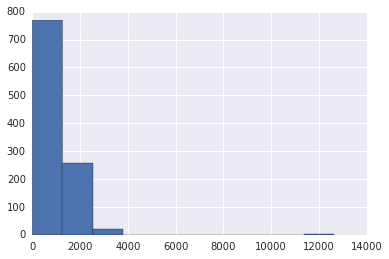

In [249]:
transactions_df.groupby('id').purchasequantity.count().hist()

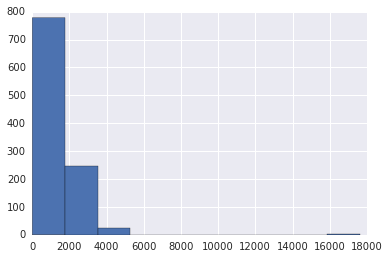

In [250]:
transactions_df.groupby('id').purchasequantity.sum().hist()

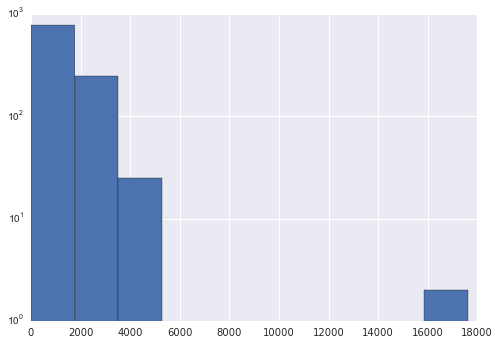

In [50]:
transactions_df.groupby('id').purchasequantity.sum().hist(log='x')

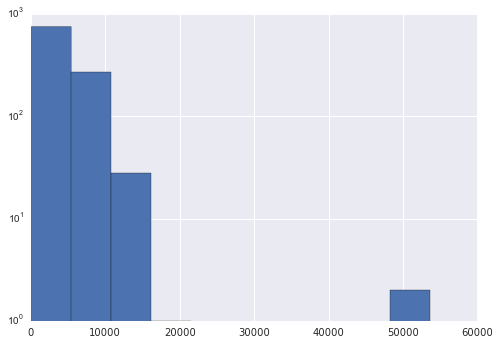

In [51]:
transactions_df.groupby('id').purchaseamount.sum().hist(log='x')

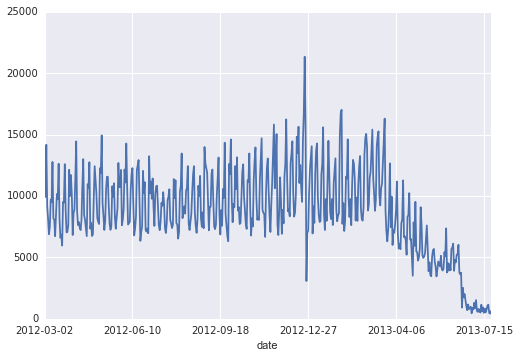

In [238]:
transactions_df.groupby('date').purchaseamount.sum().plot()

------------------------------------------
Part 2
==========================================
Moving to StarCluster
------------------------------------------

Add the `ipcluster` plugin if you haven't already.

Near the bottom of `.starcluster/config`:
```bash
######################
## Built-in Plugins ##
######################
# The following plugins ship with StarCluster and should work out-of-the-box.
# Uncomment as needed. Don't forget to update your PLUGINS list!
# See http://star.mit.edu/cluster/docs/latest/plugins for plugin details.
# .
# .
# .
[plugin ipcluster]
SETUP_CLASS = starcluster.plugins.ipcluster.IPCluster
# Enable the IPython notebook server (optional)
ENABLE_NOTEBOOK = True
# Set a password for the notebook for increased security
# This is optional but *highly* recommended
NOTEBOOK_PASSWD = a-secret-password
```

Set `CLUSTER_SIZE` to `3` for more memory *(see [aws.amazon.com/ec2/instance-types](http://aws.amazon.com/ec2/instance-types/) for details)*:
```bash
[cluster smallcluster]
# number of ec2 instances to launch
CLUSTER_SIZE = 3
NODE_IMAGE_ID = ami-6b211202
PLUGINS = ipcluster
SPOT_BID = 0.10
```
Also set `SPOT_BID` to `0.10` (or less?) to save $$$ *(see [aws.amazon.com/ec2/purchasing-options/spot-instances](http://aws.amazon.com/ec2/purchasing-options/spot-instances/) for details)*

Start your new cluster:

`$ starcluster start my_cluster`

Copy your credentials to your cluster:

`$ starcluster put my_cluster --user sgeadmin ~/Downloads/credentials.csv /home/sgeadmin/`

This should, as a side effect, add your cluster to the list of known hosts on your machine. 
In my experience, it often doesn't, however. 
Therefore, **you will want to:**

```bash
starcluster sshmaster my_cluster
```
**before you do the following (or `Client` will hang forever):**

In [23]:
url_file = os.path.expanduser('~/.starcluster/ipcluster/SecurityGroup:@sc-mycluster-us-east-1.json')
sshkey = os.path.expanduser('~/.ssh/mykey.rsa')  # replace with your pem
client = Client(url_file, sshkey = sshkey)

TimeoutError: Hub connection request timed out

Check to see how many engines you have running:

In [24]:
dview = client.direct_view()
len(client.ids)

NameError: name 'client' is not defined

If there are fewer engines running than expected, that's probably because they didn't start on some of the instances. We can use the following to see which instances have engines:

In [8]:
%%px
%%bash
ec2metadata --local-ipv4

[stdout:0] 10.81.200.119
[stdout:1] 10.81.200.119
[stdout:2] 10.81.200.119
[stdout:3] 10.81.200.119
[stdout:4] 10.81.200.119
[stdout:5] 10.81.200.119
[stdout:6] 10.81.200.119
[stdout:7] 10.153.214.91
[stdout:8] 10.153.214.91
[stdout:9] 10.143.218.57
[stdout:10] 10.153.214.91
[stdout:11] 10.143.218.57
[stdout:12] 10.153.214.91
[stdout:13] 10.169.71.165
[stdout:14] 10.153.214.91
[stdout:15] 10.143.218.57
[stdout:16] 10.169.71.165
[stdout:17] 10.143.218.57
[stdout:18] 10.153.214.91
[stdout:19] 10.153.214.91
[stdout:20] 10.153.214.91
[stdout:21] 10.143.218.57
[stdout:22] 10.169.71.165
[stdout:23] 10.143.218.57
[stdout:24] 10.169.71.165
[stdout:25] 10.143.218.57
[stdout:26] 10.143.218.57
[stdout:27] 10.169.71.165
[stdout:28] 10.169.71.165
[stdout:29] 10.169.71.165
[stdout:30] 10.169.71.165
[stdout:31] 10.140.151.151
[stdout:32] 10.140.151.151
[stdout:33] 10.140.151.151
[stdout:34] 10.140.151.151
[stdout:35] 10.140.151.151
[stdout:36] 10.140.151.151
[stdout:37] 10.13.201.9
[stdout:38] 10.13.

We need to set up each of our engines individually. We can do this quickly with the `%%px` magic:

In [13]:
%%px
import pandas as pd
from boto.s3.connection import S3Connection
from collections import defaultdict

credentials = pd.read_csv('credentials.csv')

s3conn = S3Connection(credentials['Access Key Id'][0], credentials['Secret Access Key'][0])
transactions = s3conn.get_bucket('dat-sf-12')

We then scatter the keys to our S3 files across our cluster:

In [14]:
dview.scatter('transaction_keys', [key.name for key in transaction_keys], dist='r')

<AsyncResult: scatter>

Since all but the first file are missing a header, we will want to use the column names from the first file and push that to our engines:

In [33]:
dview.push({'transaction_columns': list(transactions_df.columns)})

<AsyncResult: _push>

In [34]:
%%px -t 0
transaction_columns

Out[0:12]: 
['id',
 'chain',
 'dept',
 'category',
 'company',
 'brand',
 'date',
 'productsize',
 'productmeasure',
 'purchasequantity',
 'purchaseamount']

If we were unable to investigate our data locally (perhaps the download failed) we can do so on engine zero by specifying the `target` thus:  
*(only do this if the above attempt at running `get_contents_as_string` failed)* 

In [35]:
%%px
len(transaction_keys)

Out[0:13]: 8

Out[1:9]: 8

Out[2:9]: 8

Out[3:8]: 8

Out[4:7]: 8

Out[5:7]: 8

Out[6:7]: 8

Out[7:7]: 8

Out[8:7]: 8

Out[9:7]: 8

Out[10:7]: 8

Out[11:7]: 8

Out[12:7]: 8

Out[13:7]: 8

Out[14:7]: 8

Out[15:7]: 8

Out[16:7]: 8

Out[17:7]: 8

Out[18:7]: 8

Out[19:7]: 8

Out[20:7]: 8

Out[21:7]: 7

Out[22:7]: 7

Out[23:7]: 7

Out[24:7]: 7

Out[25:7]: 7

Out[26:7]: 7

Out[27:7]: 7

Out[28:7]: 7

Out[29:7]: 7

Out[30:7]: 7

Out[31:8]: 7

Out[32:7]: 7

Out[33:9]: 7

Out[34:7]: 7

Out[35:7]: 7

Out[36:7]: 7

Out[37:7]: 7

Out[38:7]: 7

Out[39:7]: 7

Out[40:7]: 7

Out[41:7]: 7

Out[42:7]: 7

Out[43:7]: 7

Out[44:7]: 7

Out[45:7]: 7

Out[46:7]: 7

In [36]:
%%px --targets 0
twokeys = transaction_keys[:2]
twokeys

Out[0:14]: [u'transactions/trans-aa', u'transactions/trans-bv']

In [37]:
%%px -t0
transactions_df = pd.DataFrame(columns=transaction_columns)
for key_name in twokeys:    
    filename = '/mnt/sgeadmin/{}.csv'.format(key_name.split('/')[-1])
    transaction_key = transactions.get_key(key_name)
    transaction_key.get_contents_to_filename(filename)
    if 'trans-aa' in filename:
        skiprows = 1
    else:
        skiprows = 0
    transactions_df = transactions_df.append(pd.read_csv(filename, names = transaction_columns, skiprows = skiprows))

Why `/mnt/sgeadmin/`? EC2 instances don't put very much storage capacity in the `/home/` directory. Instead, the large storage volume is mounted at `/mnt/`. `/mnt/` is owned by `root` so IPython can't write there (since IPython is run by `sgeadmin`) but `/mnt/sgeadmin/` is owned by `sgeadmin` and so that is where we will write our files.

In [41]:
%%px -t1
transactions_df.shape

Out[1:11]: (8000000, 11)

In [39]:
%%px
transactions_df = pd.DataFrame(columns=transaction_columns)
for key_name in transaction_keys:
    filename = '/mnt/sgeadmin/{}.csv'.format(key_name.split('/')[-1])
    transaction_key = transactions.get_key(key_name)
    transaction_key.get_contents_to_filename(filename)
    if 'trans-aa' in filename:
        skiprows = 1
    else:
        skiprows = 0
    transactions_df = transactions_df.append(pd.read_csv(filename, names = transaction_columns, skiprows = skiprows))

------------------------------------------
Intermission
------------------------------------------
------------------------------------------
While you're waiting...
```bash
starcluster sshmaster my_medium_cluster
htop
```
------------------------------------------

In [42]:
%%px
user_id_counts = transactions_df.groupby('id').purchasequantity.count()

In [45]:
%%px -t 0:10:3
len(user_id_counts)

Out[0:21]: 6271

Out[3:12]: 7746

Out[6:11]: 7028

Out[9:11]: 7458

In [43]:
%%px
user_id_counts_dict = user_id_counts.to_dict()

In [44]:
user_id_counts_list = dview.gather('user_id_counts_dict').get()

In [51]:
user_id_counts_series = pd.DataFrame(map(pd.Series, user_id_counts_list)).sum()

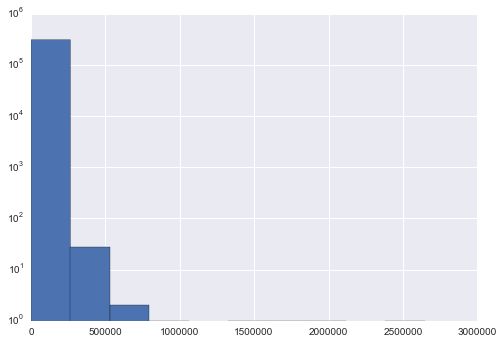

In [52]:
user_id_counts_series.hist(log='x')

Lab
---------
In pairs:
=========
Plot the sum of the purchase amount by date using all of the data

### If you think that was easy:
Get offers and history files from [kaggle.com/c/acquire-valued-shoppers-challenge/data](https://www.kaggle.com/c/acquire-valued-shoppers-challenge/data)/. The transactions file can be joined to the history file by (id,chain). The history file can be joined to the offers file by (offer). The transactions file can be joined to the offers file by (category, brand, company).

*Hint: the easiest way to do this is probably to copy those tables to every engine.*

Using outer joins, what can you discover about these data?

------------------------------------------
# ¡¡¡DON'T FORGET TO TERMINATE YOUR CLUSTER BEFORE YOU LEAVE CLASS!!!
------------------------------------------